# California House

## Contents:
1. Business Problem Understanding

2. Data Understanding

3. Data Cleaning

4. Exploratory Data Analysis

5. Conclusion and Recommendation

# Business Problem Understanding

## Context

Dataset California House merupakan sebuah dataset yang dapat dipergunakan untuk menganalsis dan memprediksi harga rumah yang terletak di California. Hal tersebut dapat berguna bagi agen real estate, pembeli rumah, maupun pihak lain yang tertarik dengan rumah di California. 

**Goals**

Berdasarkan permasalahan di atas, maka diperlukan sebuah 'alat' yang dapat memprediksi serta membantu pembeli maupun tuan pemilik rumah untuk dapat menentukan harga properti yang tepat.

**Analytic Approach**

Hal tersebut menunjukkan bahwa kita perlu melakukan analisis data untuk dapat menemukan pola yang diperoleh dari fitur-fitur yang terdapat pada dataset tersebut.

Tahap selanjutnya, kita dapat membangun model regresi yang dapat membantu perusahaan untuk dapat menyediakan 'alat' yang dapat dipergunakan untuk perusahaan, pembeli rumah, maupun pemilik rumah dalam menentukan harga sewa atau harga jual. 

**Metric Evaluation**

Evaluasi metric yang akan digunakan adalah RSE, MAE, MSE, dan R2. RMSE merupakan nilai rataan akar kuadarat dari error. MAE adalah nilai kesalahan rata-rata antara nilai prediksi dan nilai aktual dalam regresi, dan dapat memberikan gambaran tentang sejauh mana rata-rata kesalahan prediksi dari nilai aktual. MSE merupakan nilai yang menghitung selisih kuadrat antara nilai prediksi dan nilai aktual, serta memberikan gambaran tentang sejauh mana kesalahn prediksi dari nilai aktual, dengan memberikan bobot lebih pada kesalahan yang lebih besar. R2 atau R-Squared, merupakan nilai yang mengukur sejauh mana variabilitas variabel target dapat dijelaskan oleh model regresi, semkain tinggi nilai R2, maka semakin baik model dalam menjelaskan variasi data.



# Data Understanding

## Atributes Information

1. Longitude : Garis lintang/north

2. Latitude : Garis bujur/west

3. Housing Median Age : Umur rumah

4. Total Rooms : Total ruangan dalam 1 blok

5. Total Berdooms : Total kamar tidur dalam 1 blok

6. Population : Total penghuni dalam 1 blok

7. Households : Jumlah keluarga yang tinggal dalam 1 unit rumah, dalam 1 blok

8. Median Income: Pendapatan rata-rata dalam 1 blok (USD) 

9. Ocean Proximity :  Lokasi rumah atau jarak rumah dari laut

10. Median House Value : Harga rata-rata rumah dalam 1 blok (USD)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [3]:
df_copy = df.copy()


In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [5]:
df_copy.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Cleaning

In [6]:
#Untuk menampilkan statistik deskriptif sebelum data di cleaning
df_copy.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448,14448.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6369,NaN
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,NaN,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,NaN,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,NaN,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,NaN,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,NaN,263900.000000


In [7]:
#searching for missing value
df_copy.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

## Missing Value
Terdapat missing value pada feature total_bedrooms, sebanyal 137 baris.

Untuk mencari korelasi antara feature total bedrooms (yang terdapat missing values) maka dilakukan pengecekkan hubungannnya dengan median house value

In [8]:
#menyiapkan data, karena tidak mau data asli berubah 
df_with_na = df.copy()

In [9]:
#1. Make a list who has missing values
features_with_na = [features for features in df_with_na.columns if df_with_na[features].isnull().sum()>1]
#2. Print the percentile of missing values
for feature in features_with_na:
    print(feature, np.round(df_with_na[feature].isnull().mean(),4), '% missing values')

total_bedrooms 0.0095 % missing values


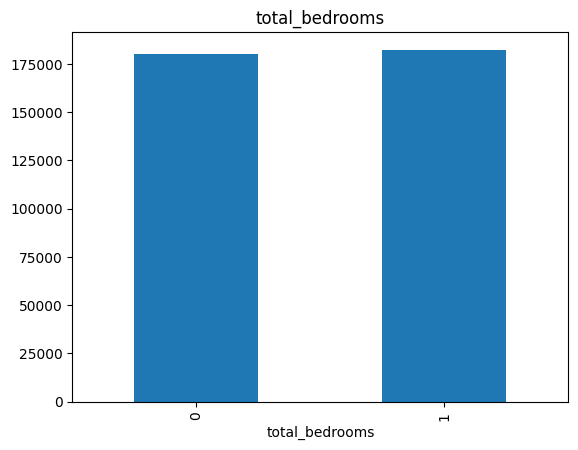

In [10]:
#1 for missing values

for feature in features_with_na:
    data = df_with_na

    data[feature] = np.where(data[feature].isnull(), 1, 0)

    data.groupby(feature)['median_house_value'].median().plot.bar()
    plt.title(feature)
    plt.show()

#1 have a higher graphic than 0(not missing)

In [11]:
#Describe numerical column
pd.set_option('display.float_format',lambda x: '%.4f' %x)
impute = ['total_bedrooms']
desc_clean = df_copy[impute].describe()
desc_clean.loc['skewness'] = df_copy[impute].skew()
desc_clean.round(2)

,total_bedrooms
count,14311.0000
mean,538.2600
std,423.5800
min,1.0000
25%,295.0000
50%,435.0000
75%,647.0000
max,6445.0000
skewness,3.3900


Feature total bedrooms memiliki skewed distribution, imputasi data dengan median

In [12]:
#show the data who have a NaN in total bedrooms column
bool_series=pd.isnull(df_copy['total_bedrooms'])
df_copy[bool_series]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.4700,38.6100,31.0000,1072.0000,NaN,781.0000,281.0000,1.6563,INLAND,65800.0000
119,-117.2800,34.2600,18.0000,3895.0000,NaN,1086.0000,375.0000,3.3672,INLAND,133600.0000
251,-117.6100,34.0800,12.0000,4427.0000,NaN,2400.0000,843.0000,4.7147,INLAND,158700.0000
340,-122.7000,38.3500,14.0000,2313.0000,NaN,954.0000,397.0000,3.7813,<1H OCEAN,146500.0000
410,-122.4200,40.4400,16.0000,994.0000,NaN,495.0000,181.0000,2.1875,INLAND,76400.0000
...,...,...,...,...,...,...,...,...,...,...
13856,-117.9600,34.0300,35.0000,2093.0000,NaN,1755.0000,403.0000,3.4115,<1H OCEAN,150400.0000
13932,-117.8700,33.8300,27.0000,2287.0000,NaN,1140.0000,351.0000,5.6163,<1H OCEAN,231000.0000
13989,-118.4000,34.1700,24.0000,6347.0000,NaN,2945.0000,1492.0000,3.3545,<1H OCEAN,221500.0000
14308,-118.5500,34.1900,18.0000,5862.0000,NaN,3161.0000,1280.0000,3.1106,<1H OCEAN,170600.0000


In [13]:
#Search the median of Total Bedrooms column, to impute the values of the NaN values
med = df_copy['total_bedrooms'].median()
print(f'Total Bedrooms Median= {med}')

Total Bedrooms Median= 435.0


In [14]:
#Impute the median
df_copy['total_bedrooms'].fillna(med,inplace=True)
#Data updated NaN to Median values.
df_copy[bool_series]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.4700,38.6100,31.0000,1072.0000,435.0000,781.0000,281.0000,1.6563,INLAND,65800.0000
119,-117.2800,34.2600,18.0000,3895.0000,435.0000,1086.0000,375.0000,3.3672,INLAND,133600.0000
251,-117.6100,34.0800,12.0000,4427.0000,435.0000,2400.0000,843.0000,4.7147,INLAND,158700.0000
340,-122.7000,38.3500,14.0000,2313.0000,435.0000,954.0000,397.0000,3.7813,<1H OCEAN,146500.0000
410,-122.4200,40.4400,16.0000,994.0000,435.0000,495.0000,181.0000,2.1875,INLAND,76400.0000
...,...,...,...,...,...,...,...,...,...,...
13856,-117.9600,34.0300,35.0000,2093.0000,435.0000,1755.0000,403.0000,3.4115,<1H OCEAN,150400.0000
13932,-117.8700,33.8300,27.0000,2287.0000,435.0000,1140.0000,351.0000,5.6163,<1H OCEAN,231000.0000
13989,-118.4000,34.1700,24.0000,6347.0000,435.0000,2945.0000,1492.0000,3.3545,<1H OCEAN,221500.0000
14308,-118.5500,34.1900,18.0000,5862.0000,435.0000,3161.0000,1280.0000,3.1106,<1H OCEAN,170600.0000


In [15]:
#checking the imputation is success or no
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Pengubahan nama feature tanpa simbol

In [16]:
df_copy =df_copy.rename(columns={'longitude' : 'Longitude',
                                   'latitude':'Latitude',
                                   'housing_median_age':'Housing Median Age',
                                   'total_rooms':'Total Rooms',
                                   'total_bedrooms':'Total Bedrooms',
                                   'population':'Population',
                                   'households':'HouseHolds',
                                   'median_income':'Median Income',
                                   'ocean_proximity': 'Ocean Proximity',
                                   'median_house_value':'Median House Value',
                                   })

Pengecekkan values dan typo

In [17]:
df_copy.columns

Index(['Longitude', 'Latitude', 'Housing Median Age', 'Total Rooms',
       'Total Bedrooms', 'Population', 'HouseHolds', 'Median Income',
       'Ocean Proximity', 'Median House Value'],
      dtype='object')

Pengecekkan duplikkat

In [18]:
duplicated = df_copy.duplicated().sum()
print('Data terduplikat = ', duplicated)

Data terduplikat =  0


In [19]:
# copy the dataset already clean
df_clean = df_copy.copy()

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Longitude           14448 non-null  float64
 1   Latitude            14448 non-null  float64
 2   Housing Median Age  14448 non-null  float64
 3   Total Rooms         14448 non-null  float64
 4   Total Bedrooms      14448 non-null  float64
 5   Population          14448 non-null  float64
 6   HouseHolds          14448 non-null  float64
 7   Median Income       14448 non-null  float64
 8   Ocean Proximity     14448 non-null  object 
 9   Median House Value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Encoding Ocean Proximity

Karena fitur Ocean Proximity memiliki type object (kategorikal), maka perlunya encoding fitur Ocean Proximity untuk memudahkan proses regresi.

In [21]:
dum_df = pd.get_dummies(df_clean, columns=['Ocean Proximity'], prefix = ['Ocean Proximity'])
df_clean = df_clean.merge(dum_df)
df_clean

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,HouseHolds,Median Income,Ocean Proximity,Median House Value,Ocean Proximity_<1H OCEAN,Ocean Proximity_INLAND,Ocean Proximity_ISLAND,Ocean Proximity_NEAR BAY,Ocean Proximity_NEAR OCEAN
0,-119.7900,36.7300,52.0000,112.0000,28.0000,193.0000,40.0000,1.9750,INLAND,47500.0000,0,1,0,0,0
1,-122.2100,37.7700,43.0000,1017.0000,328.0000,836.0000,277.0000,2.2604,NEAR BAY,100000.0000,0,0,0,1,0
2,-118.0400,33.8700,17.0000,2358.0000,396.0000,1387.0000,364.0000,6.2990,<1H OCEAN,285800.0000,1,0,0,0,0
3,-118.2800,34.0600,17.0000,2518.0000,1196.0000,3051.0000,1000.0000,1.7199,<1H OCEAN,175000.0000,1,0,0,0,0
4,-119.8100,36.7300,50.0000,772.0000,194.0000,606.0000,167.0000,2.2206,INLAND,59200.0000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.2600,38.2700,20.0000,1314.0000,229.0000,712.0000,219.0000,4.4125,INLAND,144600.0000,0,1,0,0,0
14444,-120.8900,37.4800,27.0000,1118.0000,195.0000,647.0000,209.0000,2.9135,INLAND,159400.0000,0,1,0,0,0
14445,-121.9000,36.5800,31.0000,1431.0000,435.0000,704.0000,393.0000,3.1977,NEAR OCEAN,289300.0000,0,0,0,0,1
14446,-117.9300,33.6200,34.0000,2125.0000,498.0000,1052.0000,468.0000,5.6315,<1H OCEAN,484600.0000,1,0,0,0,0


In [22]:
df_clean = df_clean.rename(columns={'Ocean Proximity_<1H OCEAN':'Ocean Proximity 1H',
                                   'Ocean Proximity_INLAND': 'Ocean Proximity Inland',
                                   'Ocean Proximity_ISLAND': 'Ocean Proximity Island',
                                   'Ocean Proximity_NEAR BAY':'Ocean Proximity Near Bay',
                                   'Ocean Proximity_NEAR OCEAN':'Ocean Proximity Near Ocean'})

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 0 to 14447
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Longitude                   14448 non-null  float64
 1   Latitude                    14448 non-null  float64
 2   Housing Median Age          14448 non-null  float64
 3   Total Rooms                 14448 non-null  float64
 4   Total Bedrooms              14448 non-null  float64
 5   Population                  14448 non-null  float64
 6   HouseHolds                  14448 non-null  float64
 7   Median Income               14448 non-null  float64
 8   Ocean Proximity             14448 non-null  object 
 9   Median House Value          14448 non-null  float64
 10  Ocean Proximity 1H          14448 non-null  uint8  
 11  Ocean Proximity Inland      14448 non-null  uint8  
 12  Ocean Proximity Island      14448 non-null  uint8  
 13  Ocean Proximity Near Bay    144

Pemisahan data numerikal dan kategorikal

In [24]:
numerical_features = [feature for feature in df_clean.columns if df_clean[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

#visualise the numerical variables
df_clean[numerical_features].head()

Number of numerical variables:  14


,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,HouseHolds,Median Income,Median House Value,Ocean Proximity 1H,Ocean Proximity Inland,Ocean Proximity Island,Ocean Proximity Near Bay,Ocean Proximity Near Ocean
0,-119.7900,36.7300,52.0000,112.0000,28.0000,193.0000,40.0000,1.9750,47500.0000,0,1,0,0,0
1,-122.2100,37.7700,43.0000,1017.0000,328.0000,836.0000,277.0000,2.2604,100000.0000,0,0,0,1,0
2,-118.0400,33.8700,17.0000,2358.0000,396.0000,1387.0000,364.0000,6.2990,285800.0000,1,0,0,0,0
3,-118.2800,34.0600,17.0000,2518.0000,1196.0000,3051.0000,1000.0000,1.7199,175000.0000,1,0,0,0,0
4,-119.8100,36.7300,50.0000,772.0000,194.0000,606.0000,167.0000,2.2206,59200.0000,0,1,0,0,0


In [25]:
discrete_feature = [feature for feature in numerical_features if len(df_clean[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [26]:
continous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print('Continous Variables Count: {}'.format(len(continous_feature)))

Continous Variables Count: 9


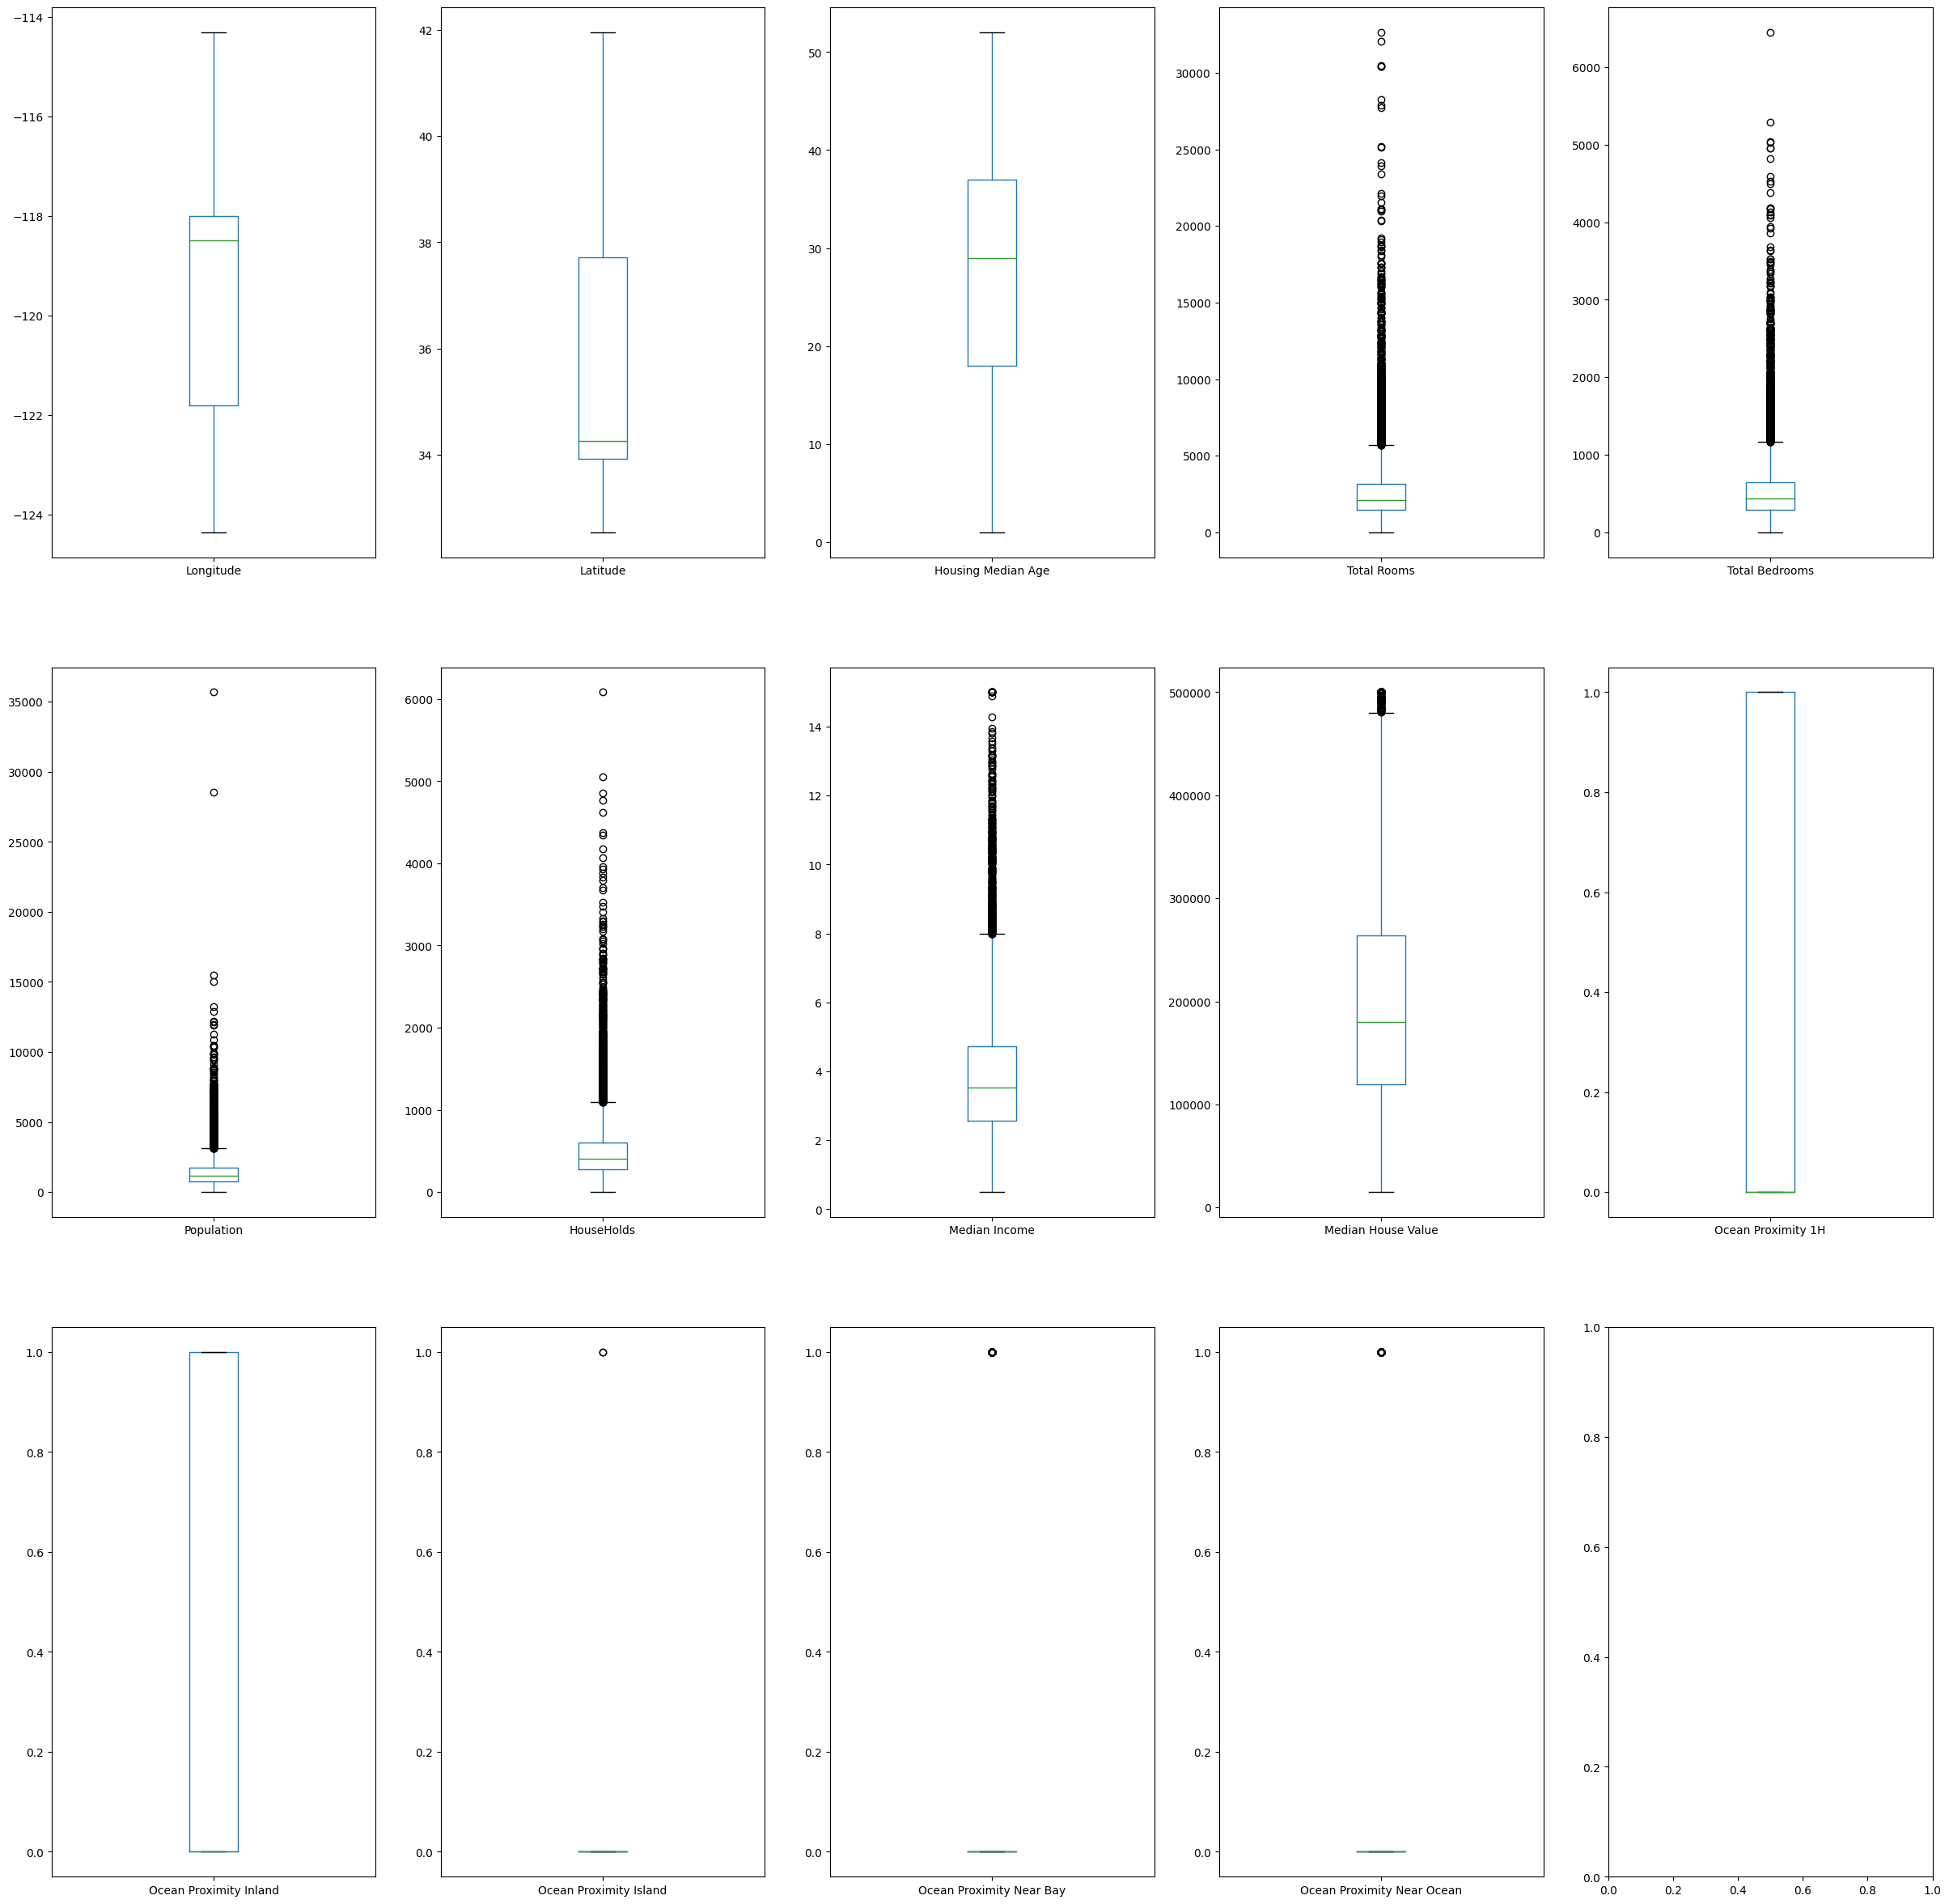

In [27]:
#boxplot, checking outliers
fig,axes = plt.subplots(nrows=3, ncols=5, figsize=(30,30))
for a, el in enumerate(numerical_features):
    i = df_clean.boxplot(el, ax=axes.flatten()[a], grid=False)
plt.show()

Boxplot

Seluruh data  penting dan dibutuhkan dalam membuat model linear regresi sehingga tidak dilakukan perlakuan apapun terhadap outlier

# Exploratory Data Analysis

## Descriptive Statistics
1. Categorical Feature

In [28]:
categorical_column = ['Ocean Proximity']
df_clean[categorical_column].describe()

,Ocean Proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


2. Numerical Features

In [29]:
#Describe numerical column
pd.set_option('display.float_format',lambda x: '%.4f' %x)
desc_clean = df_clean[numerical_features].describe()
desc_clean.loc['kurtosis'] = df_clean[numerical_features].kurt()
desc_clean.loc['skewness'] = df_clean[numerical_features].skew()
desc_clean.loc['variance'] = df_clean[numerical_features].var()
desc_clean.round(2)

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,HouseHolds,Median Income,Median House Value,Ocean Proximity 1H,Ocean Proximity Inland,Ocean Proximity Island,Ocean Proximity Near Bay,Ocean Proximity Near Ocean
count,14448.0000,14448.0000,14448.0000,14448.0000,14448.0000,14448.0000,14448.0000,14448.0000,14448.0000,14448.0000,14448.0000,14448.0000,14448.0000,14448.0000
mean,-119.5700,35.6300,28.6200,2640.1300,537.2800,1425.1600,499.5100,3.8700,206824.6200,0.4400,0.3200,0.0000,0.1100,0.1300
std,2.0100,2.1400,12.6000,2191.6100,421.6800,1149.5800,383.1000,1.8900,115365.4800,0.5000,0.4700,0.0100,0.3200,0.3400
min,-124.3500,32.5400,1.0000,2.0000,1.0000,3.0000,1.0000,0.5000,14999.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,-121.8000,33.9300,18.0000,1451.0000,296.0000,784.0000,279.0000,2.5700,119600.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,-118.4900,34.2600,29.0000,2125.0000,435.0000,1165.0000,410.0000,3.5400,180000.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,-118.0000,37.7100,37.0000,3148.0000,645.0000,1724.0000,604.0000,4.7400,263900.0000,1.0000,1.0000,0.0000,0.0000,0.0000
max,-114.3100,41.9500,52.0000,32627.0000,6445.0000,35682.0000,6082.0000,15.0000,500001.0000,1.0000,1.0000,1.0000,1.0000,1.0000
kurtosis,-1.3300,-1.1100,-0.8000,28.5200,20.7000,90.4600,20.8400,4.8500,0.3400,-1.9400,-1.3800,7221.5000,4.0400,2.8400
skewness,-0.3000,0.4700,0.0600,3.9800,3.4100,5.4600,3.3500,1.6300,0.9800,0.2400,0.7900,84.9900,2.4600,2.2000


## Normalitas

In [31]:
#check for normality
from scipy.stats import normaltest

def normality_test(x, alpha=0.05):
  # normality test
  stat, p = normaltest(x)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
  else:
    print('Sample does not look Gaussian (reject H0)')

In [32]:
normality_test(df_clean['Longitude'])

Statistics=174553.467, p=0.000
Sample does not look Gaussian (reject H0)


In [33]:
normality_test(df_clean['Latitude'])

Statistics=6624.318, p=0.000
Sample does not look Gaussian (reject H0)


In [34]:
normality_test(df_clean['Housing Median Age'])

Statistics=1211.289, p=0.000
Sample does not look Gaussian (reject H0)


In [35]:
normality_test(df_clean['Total Rooms'])

Statistics=12451.569, p=0.000
Sample does not look Gaussian (reject H0)


In [36]:
normality_test(df_clean['Population'])

Statistics=16394.064, p=0.000
Sample does not look Gaussian (reject H0)


In [37]:
normality_test(df_clean['HouseHolds'])

Statistics=10796.786, p=0.000
Sample does not look Gaussian (reject H0)


In [38]:
normality_test(df_clean['Median Income'])

Statistics=4892.511, p=0.000
Sample does not look Gaussian (reject H0)


In [39]:
normality_test(df_clean['Median House Value'])

Statistics=1715.725, p=0.000
Sample does not look Gaussian (reject H0)


In [40]:
normality_test(df_clean['Ocean Proximity 1H'])

Statistics=51363.523, p=0.000
Sample does not look Gaussian (reject H0)


In [41]:
normality_test(df_clean['Ocean Proximity Inland'])

Statistics=166437.304, p=0.000
Sample does not look Gaussian (reject H0)


In [42]:
normality_test(df_clean['Ocean Proximity Near Bay'])

Statistics=6668.804, p=0.000
Sample does not look Gaussian (reject H0)


In [43]:
normality_test(df_clean['Ocean Proximity Near Ocean'])

Statistics=5709.529, p=0.000
Sample does not look Gaussian (reject H0)


Seluruh data menunjukkan normalitas yang tidak normal, atau tidak memiliki kurva Gaussian yang sempurna


## Korelasi Data

Pengumpulan data numerik

In [44]:
# Ambil semua kolom yang tipenya sudah numerik
#corr_column = df_new.select_dtypes(include=[np.number]).columns.to_list()
corr_column = list(set(numerical_features)-set(['Median House Value']))
corr_column

['Population',
 'Latitude',
 'Longitude',
 'Ocean Proximity Island',
 'Total Bedrooms',
 'Housing Median Age',
 'Median Income',
 'Ocean Proximity 1H',
 'HouseHolds',
 'Ocean Proximity Near Bay',
 'Total Rooms',
 'Ocean Proximity Inland',
 'Ocean Proximity Near Ocean']

In [45]:
# menghitung jumlah kolom numerik
len(corr_column)

13

Heatmap Correlation

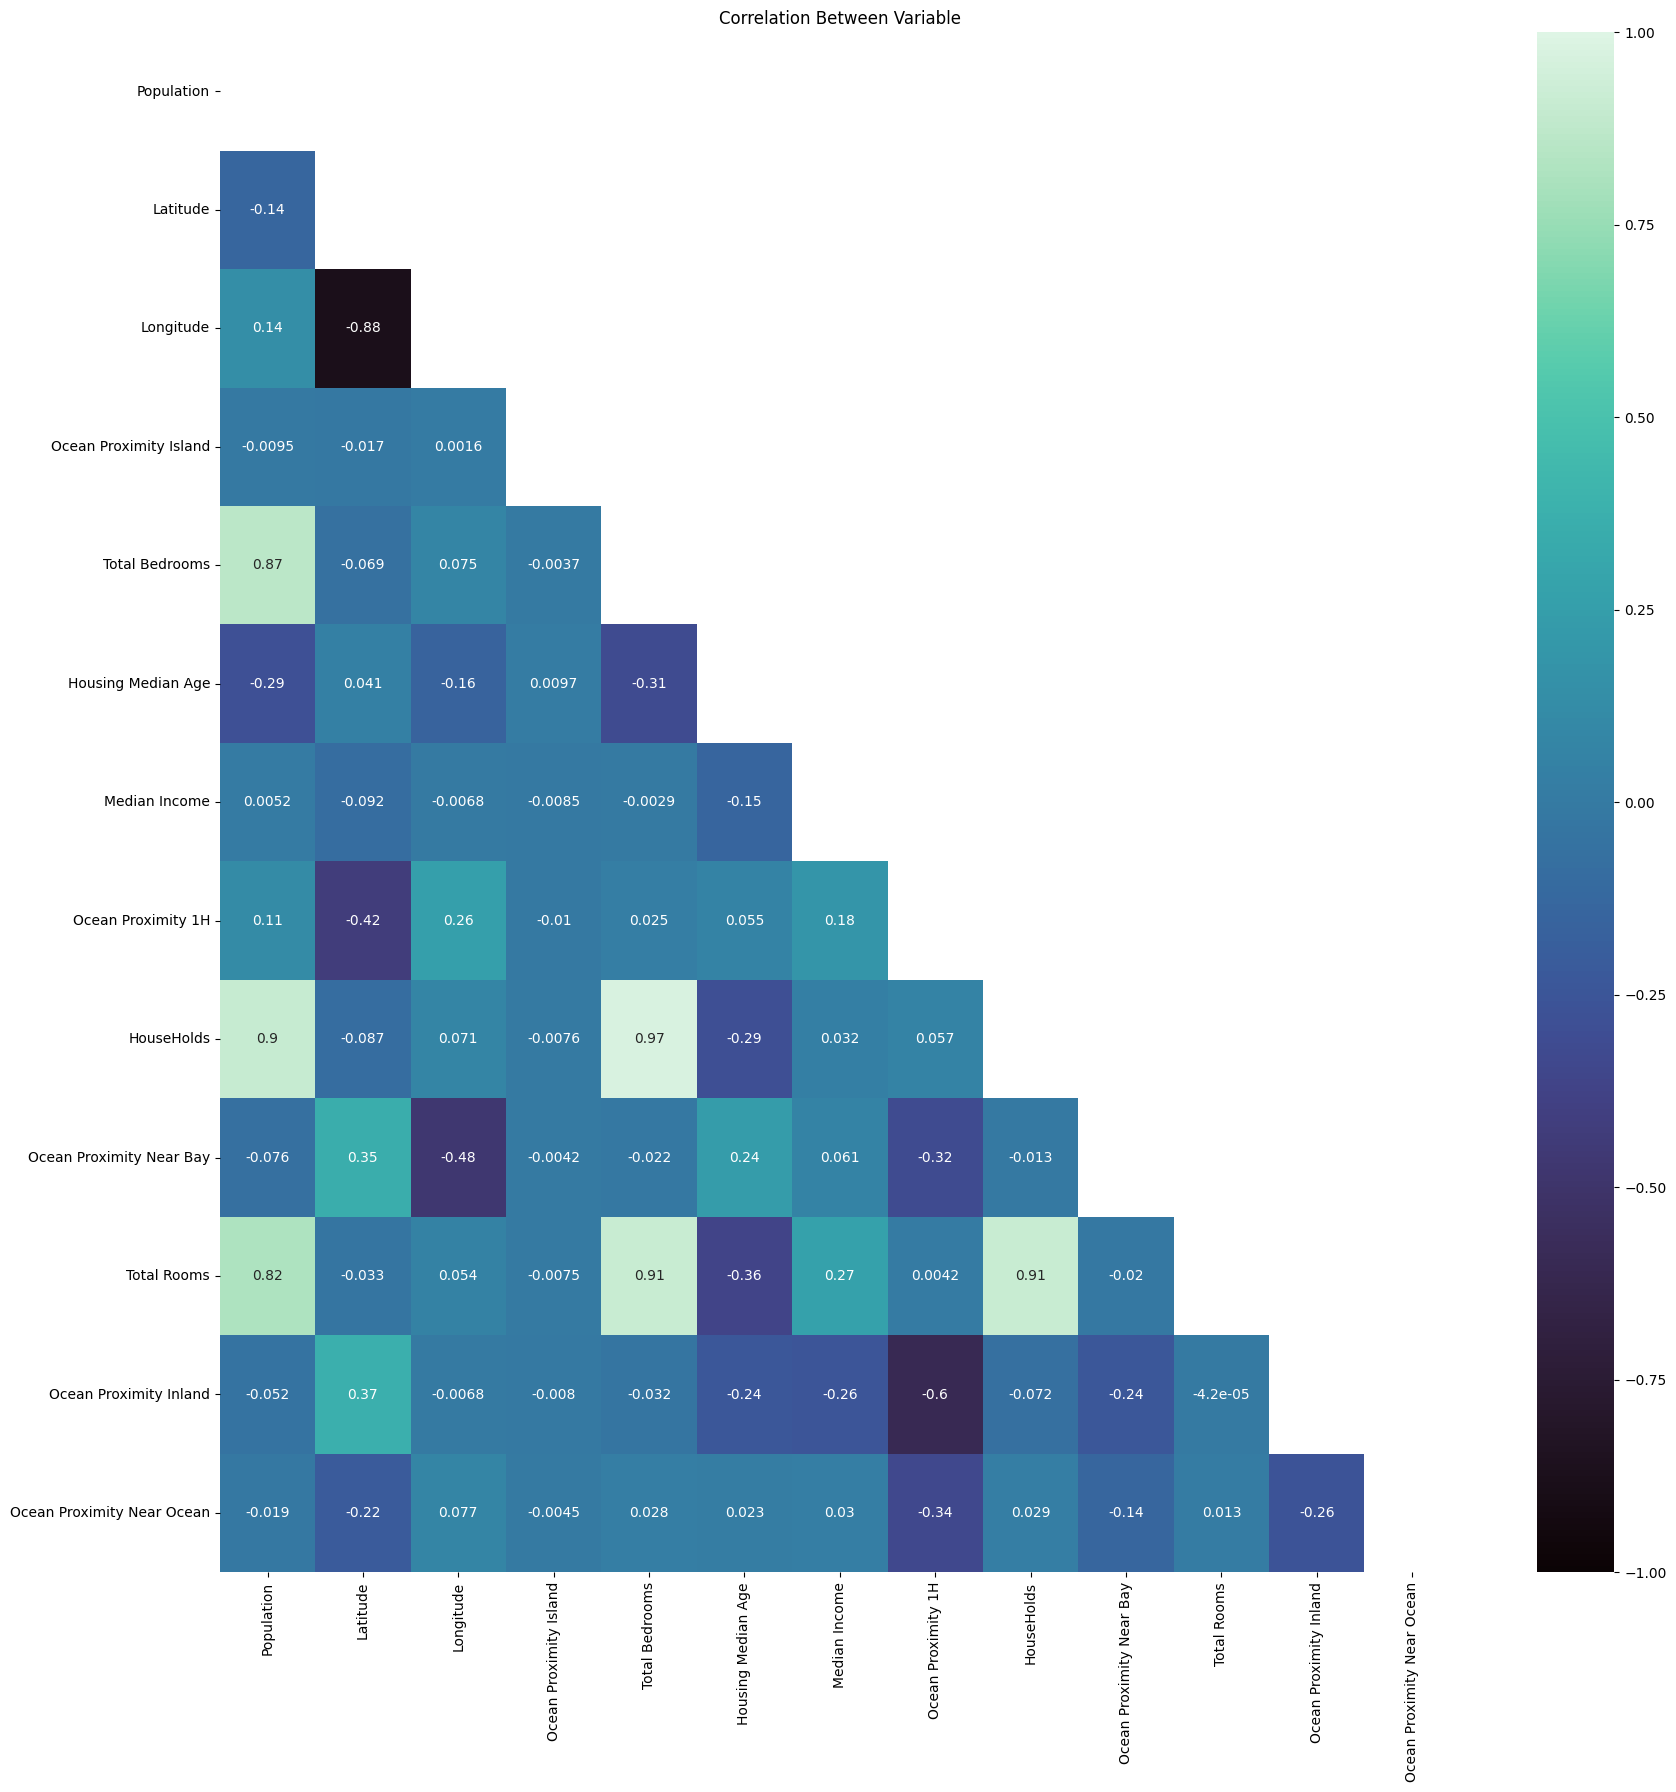

In [47]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

# Supaya matriks korelasi yang terlihat cuman bagian bawahnya
mask = np.triu(np.ones_like(
    df_clean[corr_column].corr(method='spearman')))

sns.heatmap(df_clean[corr_column].corr(method='spearman'),vmin=-1,
            vmax=1, cmap='mako', annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

- total bedrooms memiliki korelasi tinggi dengan population, total rooms, dan household

- house hold memiliki korelasi tinggi dengan population dan total rooms

- total rooms memiliki korelasi tinggi dengan population

# Modelling

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#define the whole data
x = df_clean[corr_column]
y=df_clean[['Median House Value']]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [50]:
#check split result
for df in [X_train, X_test, y_train, y_test]:
    print(df.shape)

(11558, 13)
(2890, 13)
(11558, 1)
(2890, 1)


## Benchmark Model

In [51]:
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Model 

Model yang digunakan pada dataset ini ialah:
1. Linear Regresi

2. K-Nearest Neighbor

3. XGBoost

In [52]:
linreg = LinearRegression()
kneighbor = KNeighborsRegressor()
xgb = XGBRegressor()

In [53]:
#Nilai R^2 Linear regresi
linreg.fit(X_train, y_train)
y_pred_lin= linreg.predict(X_test)
nilai_r2_linear=r2_score(y_test, y_pred_lin)
nilai_MAE_linear=mean_absolute_error(y_test, y_pred_lin)
nilai_MSE_linear=mean_squared_error(y_test, y_pred_lin)
print('Nilai R-Squared Linear Regresi: ', nilai_r2_linear)
print('Nilai MAE Linear Regresi: ', nilai_MAE_linear)
print('Nilai MSE Linear Regresi: ', nilai_MSE_linear)

#Nilai R^2 KNN 
kneighbor.fit(X_train, y_train)
y_pred_kn= kneighbor.predict(X_test)
nilai_r2_KN=r2_score(y_test, y_pred_kn)
nilai_MAE_KN=mean_absolute_error(y_test, y_pred_kn)
nilai_MSE_KN=mean_squared_error(y_test, y_pred_kn)
print('Nilai R-Squared KNN: ', nilai_r2_KN)
print('Nilai MAE KNN: ', nilai_MAE_KN)
print('Nilai MSE KNN: ', nilai_MSE_KN)

#Nilai R^2 XGBoost
xgb.fit(X_train, y_train)
y_pred_xg= xgb.predict(X_test)
nilai_r2_xgb=r2_score(y_test, y_pred_xg)
nilai_MAE_xgb=mean_absolute_error(y_test, y_pred_xg)
nilai_MSE_xgb=mean_squared_error(y_test, y_pred_xg)
print('Nilai R-Squared XGBoost:  ', nilai_r2_xgb)
print('Nilai MAE XGB: ', nilai_MAE_xgb)
print('Nilai MSE XGB: ', nilai_MSE_xgb)

Nilai R-Squared Linear Regresi:  0.6366234773612685
Nilai MAE Linear Regresi:  49867.62527413306
Nilai MSE Linear Regresi:  4851452963.912491
Nilai R-Squared KNN:  0.24183543533998575
Nilai MAE KNN:  77996.33370242214
Nilai MSE KNN:  10122282247.744747
Nilai R-Squared XGBoost:   0.8213611667850141
Nilai MAE XGB:  32608.45393598616
Nilai MSE XGB:  2385013458.154374


Nilai Model

Di atas merupakan nilai metriks yang diperoleh dari model yang sudah ditentukan

Metriks yang digunakan meliputi:

1. R-Squared

2. Mean Absolute Error

3. Mean Squared Error

In [54]:
hasil = {
    'R2' : [nilai_r2_linear, nilai_r2_KN, nilai_r2_xgb],
    'MAE' : [nilai_MAE_linear, nilai_MAE_KN, nilai_MAE_xgb],
    'MSE': [nilai_MSE_linear, nilai_MSE_KN, nilai_MSE_xgb]
}

kolom= pd.DataFrame(hasil, index=['Linear Regresi', 'KN Neighbor', 'XGBoost'])
kolom

,R2,MAE,MSE
Linear Regresi,0.6366,49867.6253,4851452963.9125
KN Neighbor,0.2418,77996.3337,10122282247.7447
XGBoost,0.8214,32608.4539,2385013458.1544


Hasil Metriks

Di atas merupakan hasil nilai metriks yang diperoleh dari 3 model.

**Nilai terbaik terdapat pada nilai R2 atau R-Squared pada model XGBoost**

In [55]:
import statsmodels.api as sm

X_constant = sm.add_constant(x)

lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median House Value   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     2203.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        22:29:28   Log-Likelihood:            -1.8139e+05
No. Observations:               14448   AIC:                         3.628e+05
Df Residuals:                   14435   BIC:                         3.629e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.938e+06   8.79e+04    -22.030      0.000   -2.11e+06   -1.77e+06
Population                   -36.1087      1.235    -29.246      0.000     -38.529     -33.689
Latitude                   -2.616e+04   1193.411    -21.920      0.000   -2.85e+04   -2.38e+04
Longitude                  -2.762e+04   1215.111    -22.729      0.000      -3e+04   -2.52e+04
Ocean Proximity Island     -2.749e+05   4.44e+04     -6.196      0.000   -3.62e+05   -1.88e+05
Total Bedrooms                81.0493      7.311     11.086      0.000      66.719      95.379
Housing Median Age          1085.7674     52.208     20.797      0.000     983.433    1188.101
Median Income               3.942e+04    400.480     98.421      0.000    3.86e+04    4.02e+04
Ocean Proximity 1H         -4.065e+05   1.92e+04    -21.166      0.000   -4.44e+05   -3.69e+05
HouseHolds                    61.6689      8.076      7.636      0.000      45.838      77.500
Ocean Proximity Near Bay   -4.112e+05   1.97e+04    -20.843      0.000    -4.5e+05   -3.73e+05
Total Rooms                   -5.3639      0.929     -5.774      0.000      -7.185      -3.543
Ocean Proximity Inland     -4.437e+05   1.81e+04    -24.473      0.000   -4.79e+05   -4.08e+05
Ocean Proximity Near Ocean -4.011e+05   1.96e+04    -20.470      0.000    -4.4e+05   -3.63e+05
==============================================================================
Omnibus:                     3574.722   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11831.450
Skew:                           1.244   Prob(JB):                         0.00
Kurtosis:                       6.670   Cond. No.                     2.85e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.78e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Hasil Linear Regresi

Hasil dari Linear Regresi menunjukkan bahwa:
- R-squared dengan nilai 0.646 (underfitting)
- F-Statistic adalah nilai yang menguji signifikansi keseluruhan model regresi. Nilai p yang diperoleh cukup besar, maka dapat disimpulkan bahwa tidak ada variabel yang berpengaruh secara signifikan terhadap variabel dependen.
- Standard Error merupakan estimasi standar kesalahan untuk masing-masing koefisien, semakin rendah maka semakin akurat estimasi koefisien tersebut

XGBoost dipilih untuk menjadi model data ini, dikarenakan dataset mengalami underfitting dan model yang dapat membantu data underfitting salah satunya adalah XGBoost


## Modelling XGBoost

In [56]:
from xgboost import XGBRegressor 
import xgboost as xgb

In [82]:
#pembuatan variabel untuk model
model = XGBRegressor()

In [83]:
xgb_model = xgb.XGBRegressor()

In [84]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Predicting

In [85]:
#Prediksi untuk train dan test data
predictions = model.predict(X_test)

In [61]:
#pengetesan dengan array
predictions[0:10]

array([149382.48, 159395.58, 181448.48, 134430.58, 198140.1 , 125860.73,
       192710.73, 205884.39, 155618.98, 157928.17], dtype=float32)

In [62]:
#Pengetesan dengan arrat terhadap X test
X_test.iloc[0]

Population                   2231.0000
Latitude                       34.1000
Longitude                    -117.4200
Ocean Proximity Island          0.0000
Total Bedrooms                809.0000
Housing Median Age             18.0000
Median Income                   4.1399
Ocean Proximity 1H              0.0000
HouseHolds                    742.0000
Ocean Proximity Near Bay        0.0000
Total Rooms                  3977.0000
Ocean Proximity Inland          1.0000
Ocean Proximity Near Ocean      0.0000
Name: 7834, dtype: float64

In [63]:
#Pengetesan dengan arrat terhadap y test
y_test.iloc[0]

Median House Value   115400.0000
Name: 7834, dtype: float64

Test Prediction with Metrics

In [64]:
#variabel untuk prediksi data train
pred_train = model.predict(X_train)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [66]:
model_train = model.score(X_train, y_train)

In [67]:
#Nilai r-squared, mse, dan mae
r2_train=(r2_score(y_train, pred_train))
mse_train=(mean_squared_error(y_train, pred_train))
mae_train=(mean_absolute_error(y_train, pred_train))

print("R2 Test Score:", r2_train)
print("MSE Test Score:", mse_train)
print("MAE Test Score:", mae_train)


R2 Test Score: 0.94536681590649
MSE Test Score: 726471672.5968182
MAE Test Score: 18967.193663716418


Penngecekkan pada data test

In [68]:
model_test = model.score(X_test, y_test)

In [69]:
#nilai metriks saat sebelum di hyperparameter tuning
r2_test = (r2_score(y_test, predictions))
mse_test =(mean_squared_error(y_test, predictions))
mae_test =(mean_absolute_error(y_test, predictions))

print("R2 Test Score:", r2_test)
print("MSE Test Score:", mse_test)
print("MAE Test Score:", mae_test)



R2 Test Score: 0.8213611667850141
MSE Test Score: 2385013458.154374
MAE Test Score: 32608.45393598616


In [70]:
#Pembuatan dataframe pada nilai metriks before tuning
testtrain = {
    'R2' : [r2_train, r2_test],
    'MAE' : [mae_train, mae_test],
    'MSE': [mse_train, mse_test]
}

fitur= pd.DataFrame(testtrain, index=['Train', 'Test'])
fitur

,R2,MAE,MSE
Train,0.9454,18967.1937,726471672.5968
Test,0.8214,32608.4539,2385013458.1544


Tuning Model

In [71]:
param_grid = {
    'max_depth' : list(np.arange(1,11)),
    'learning_rate' : [0.01,0.1,0.5,1.0],
    'n_estimators' : list(np.arange(100,301,50)),
    'subsample' : [0.6,0.7,0.8,0.9],
    'gamma' : [0,1,5,10],
    'colsample_bytree': [0.6,0.7,0.8,0.9],
    'reg_alpha' : [0.001,0.01,0.1,1.0]
}

In [72]:
xgb_model = XGBRegressor()

In [73]:
#Tuning menggunakan RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

In [74]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #penggunaan RMSE untuk memvalidasi nilai MSE
print('Root Mean Squared Error:', rmse)
mse = (mean_squared_error(y_test, y_pred)) #MSE
print('Mean Squared Error:', rmse)
mae= (mean_absolute_error(y_test, y_pred)) #MAE
print('Mean Absolute Error:', rmse)

print('Best Hyperparameters:', random_search.best_params_)

Root Mean Squared Error: 52503.37691259389
Mean Squared Error: 52503.37691259389
Mean Absolute Error: 52503.37691259389
Best Hyperparameters: {'subsample': 0.8, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.5, 'gamma': 10, 'colsample_bytree': 0.8}


In [75]:
#parameter terbaik dari Randomized Search CV

best_params = random_search.best_params_

#Buat model dengan parameter terbaik
best_model = XGBRegressor(**best_params)

#Latih model menggunakan seluruh data pelatihan
best_model.fit(X_train, y_train)

#Prediksi pada data uji
y_pred_tun = best_model.predict(X_test)

#evaluasi performa model dengan metrik yang sesuai
r2_tun = r2_score(y_test, y_pred_tun)
print('R2 Score:', r2_tun)
mse_tun = mean_squared_error(y_test, y_pred_tun)
print('MSE Score:', mse_tun)
mae_tun = mean_absolute_error(y_test, y_pred_tun)
print('MAE Score: ', mae_tun)

R2 Score: 0.7935287847481662
MSE Score: 2756604587.2258973
MAE Score:  35808.89389699124


In [76]:
#sebelum hyperparameter tuning
model = {'XGB':XGBRegressor(random_state=1)}
score_before_tuning = pd.DataFrame({'R2' :r2_test, 'MSE' : mse_test, 'MAE': mae_test }, index=model.keys())
score_after_tuning = pd.DataFrame({'R2' :r2_tun, 'MSE' : mse_tun, 'MAE': mae_tun }, index=model.keys())

In [77]:
#Dataframe score sebelum tuning
score_before_tuning

,R2,MSE,MAE
XGB,0.8214,2385013458.1544,32608.4539


In [78]:
#Dataframe score setelah tuning
score_after_tuning

,R2,MSE,MAE
XGB,0.7935,2756604587.2259,35808.8939


Feature Importance

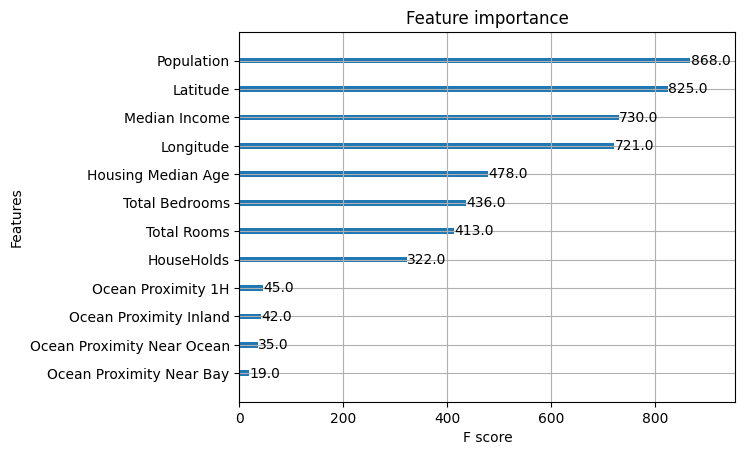

In [86]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()

Fitur penting dalam dataset ini ialah Population, Latitude, dan Median Income

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv =5).mean()

scores

0.8130006570789765

# Kesimpulan

* Model yang dihasilkan memiliki nilai 

  Sebelum tuning
   - R2 Score: 0.8201
    
   - MSE Score: 2401850193.1140	
   
   - MAE Score:  32675.5871

  Setelah tuning
   - R2 Score: 0.791435968405627
    
   - MSE Score: 2784545853.145355 
   
   - MAE Score:  36901.67913529287
* berdasarkan model yang dihasilkan, 3 faktor terbesar penentu house value adalah Population, latitude, dan median income.

* Nilai R-squared yang tinggi dapat menunjukkan bahwa model memiliki kemampuan yang baik dalam menjelaskan variasi dalam data target.

* Model ini masih perlu diimprovisasi agat dapat menghasilkan prediksi yang lebih baik lagi. 


# Recommendations

* Mengecek prediksi mana saja yang memiliki nilai error tinggi. 

* Penambahan fitur atau pengurangan fitur pada datset

* Dapat menggunakan model lebih kompleks seperti Neural Networks

* Model yang telah dibangun dapat dimanfaatkan untuk pengembangan pembuatan model lainnnya

# Save Model

In [89]:
# Save Model

import joblib

In [90]:
#Save model using joblib
joblib.dump(model, 'CaliforniaHouse_ML_XGB.joblib')

#Load the model
loaded_model = joblib.load('CaliforniaHouse_ML_XGB.joblib')

#Make predictions with the loaded model
predictions = loaded_model.predict(X_test)